In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from tools import *
from kernels import *
from learning_models import SVM, KRR
import pandas as pd
import numpy as np
from autoreload import superreload

# Testing SVM with Linear Kernel on a generated dataset

In [2]:
zeros, ones = generate_points(n_samples=600, offset=0.85)

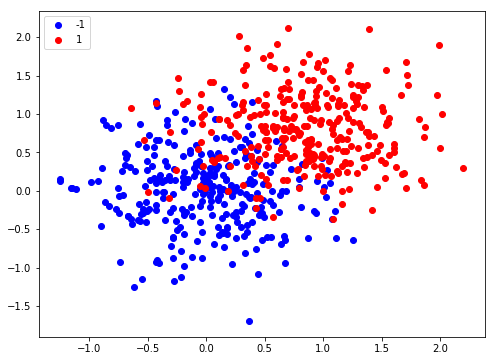

In [3]:
plot_datapoints(zeros, ones)

In [8]:
X,y = generate_dataset(zeros, ones)

In [12]:
K = polynomial_kernel_matrix(X)

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
svm = SVM(loss='hinge')

In [17]:
w, b = get_weights_and_intercept(X, K, y, svm)

In [18]:
y_pred = svm.predict(K)

x1= [ 0.         0.6465292]  x2= [ 0.5950576  0.       ]  a= -1.08649853322  c= 0.646529204615


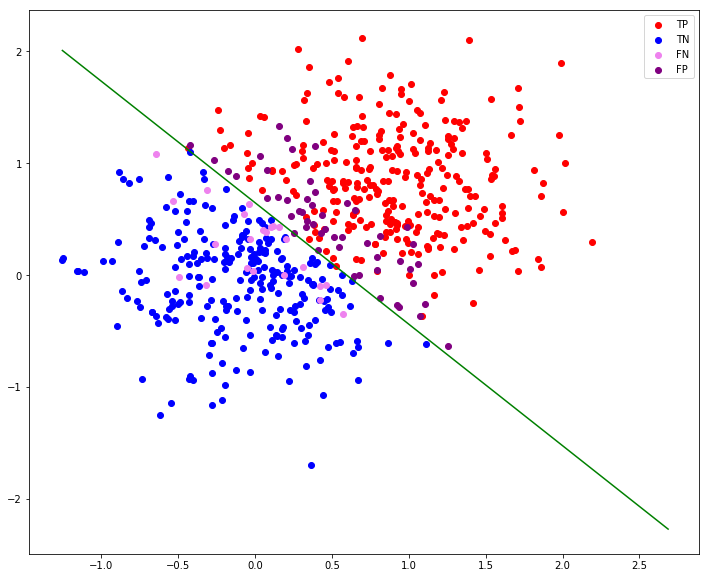

In [19]:
plot_predictions(X, y, y_pred, w, b)

In [20]:
zeros, ones = generate_points(n_samples=600, offset=0.75)

In [21]:
X_test,y_test = generate_dataset(zeros, ones)

In [22]:
X_tot = np.concatenate((X, X_test))
K_tot = polynomial_kernel_matrix(X_tot)
K_train = K_tot[:len(y), :len(y)]
K_test = K_tot[len(y):, :len(y)]

In [23]:
y_test_pred = svm.predict(K_test)

In [24]:
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y, y_pred)))
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy on Training set : 0.877
Accuracy on Training set : 0.817


### Testing SVM in higher dimension

In [25]:
off = 0.2
zeros, ones = generate_points(n_samples=50, offset=off, dim=100)

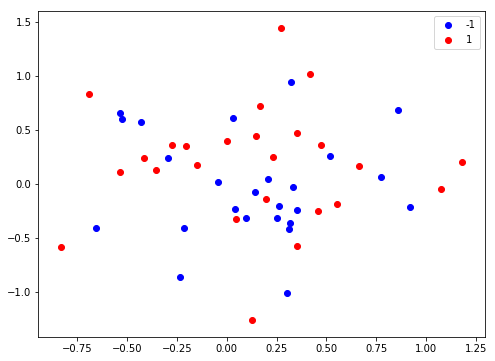

In [26]:
plot_datapoints(zeros[:,:2], ones[:,:2])

In [27]:
X,y = generate_dataset(zeros, ones)

In [28]:
K = polynomial_kernel_matrix(X)

In [29]:
svm = SVM(loss='squared_hinge', lmbd=0.001)

In [30]:
w, b = get_weights_and_intercept(X, K, y, svm)

In [31]:
y_pred = svm.predict(K)

x1= [ 0.         5.2213423]  x2= [ 73.42132534   0.        ]  a= -0.0711147922845  c= 5.22134230097


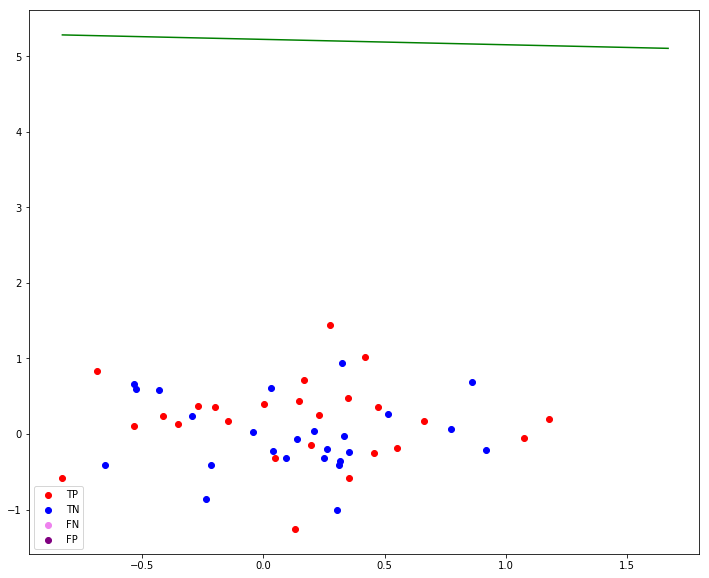

In [32]:
plot_predictions(X[:,:2], y, y_pred, w[:2], b)

In [33]:
zeros, ones = generate_points(n_samples=1000, offset=off, dim=100)

In [34]:
X_test,y_test = generate_dataset(zeros, ones)

In [35]:
X_tot = np.concatenate((X, X_test))
K_tot = polynomial_kernel_matrix(X_tot)
K_train = K_tot[:len(y), :len(y)]
K_test = K_tot[len(y):, :len(y)]

In [36]:
y_test_pred = svm.predict(K_test)

In [37]:
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y, y_pred)))
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy on Training set : 1.000
Accuracy on Training set : 0.841


# Testing on Real Data  : a dimension 50 feature embedding of genetic sequences

In [39]:
X = pd.read_csv('./data/Xtr0_mat50.csv', sep=' ', header=None).values
y = pd.read_csv("./data/Ytr0.csv", index_col=0).ix[:,0].values
y = 2 * (y - 0.5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [41]:
K = polynomial_kernel_matrix(X)
X_train, X_test, y_train, y_test, K_train, K_test = train_test_split(X, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [42]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.585 #######



### Computing a normalized version (0 mean, std 1) of the data X_norm

In [43]:
means = np.mean(X, axis=0)
sigmas = np.sqrt(np.mean((X-means)**2, axis=0))
X_norm = (X-means)/sigmas

### Using this X_norm to compare results with training on X

In [45]:
K = polynomial_kernel_matrix(X_norm)
X_train, X_test, y_train, y_test, K_train, K_test = train_test_split(X_norm, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [46]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.644 #######
			 ####### Test score = 0.600 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.643 #######
			 ####### Test score = 0.623 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.633 #######
			 ####### Test score = 0.643 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.596 #######
			 ####### Test score = 0.623 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.600 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.600 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.600 #######



### Comparing our model to sklearn's baseline 

In [47]:
from sklearn.svm import LinearSVC

In [48]:
model = LinearSVC(loss='hinge', C=0.1)

In [49]:
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.C = lmbd
    model.fit(X_train, y_train)
    y_train_pred1 = model.predict(X_train)
    y_test_pred1 = model.predict(X_test)
    train_error1 = 0.5 * np.mean(np.abs(y_train_pred1 - y_train))
    test_error1 = 0.5 * np.mean(np.abs(y_test_pred1 - y_test))
    print('------- lambda = {} -------'.format(model.C))
    print('####### Train score = {:.3f} #######'.format(1 - train_error1))
    print('####### Test score = {:.3f} #######\n'.format(1 - test_error1))

------- lambda = 0.001 -------
####### Train score = 0.610 #######
####### Test score = 0.633 #######

------- lambda = 0.01 -------
####### Train score = 0.641 #######
####### Test score = 0.627 #######

------- lambda = 0.1 -------
####### Train score = 0.642 #######
####### Test score = 0.607 #######

------- lambda = 0.5 -------
####### Train score = 0.642 #######
####### Test score = 0.595 #######

------- lambda = 1.0 -------
####### Train score = 0.641 #######
####### Test score = 0.597 #######

------- lambda = 1.5 -------
####### Train score = 0.642 #######
####### Test score = 0.597 #######

------- lambda = 10 -------
####### Train score = 0.636 #######
####### Test score = 0.613 #######



### Using more complex Kernels

##### 1) Polynomials of higher degree

In [51]:
K = polynomial_kernel_matrix(X, deg=2)
X_train, X_test, y_train, y_test, K_train, K_test = train_test_split(X, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [52]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.569 #######
			 ####### Test score = 0.535 #######



In [53]:
K = polynomial_kernel_matrix(X_norm, deg=2)
X_train, X_test, y_train, y_test, K_train, K_test = train_test_split(X_norm, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [156]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))

/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  3e+03  6e+01  1e+00
 1: -1.7254e-01 -1.2090e+00  4e+01  6e-01  1e-02
 2: -1.2854e-01 -1.1078e+00  3e+00  3e-02  5e-04
 3: -9.0249e-02 -7.4219e-01  1e+00  1e-02  2e-04
 4: -3.7299e-02 -4.1643e-01  6e-01  4e-03  7e-05
 5: -1.7252e-02 -1.9273e-01  3e-01  1e-03  2e-05
 6: -8.7063e-03 -8.6160e-02  1e-01  3e-04  6e-06
 7: -6.9300e-03 -7.5308e-02  8e-02  2e-04  4e-06
 8: -7.3034e-03 -3.9600e-02  3e-02  4e-05  8e-07
 9: -9.9665e-03 -1.4024e-02  4e-03  5e-06  8e-08
10: -1.0567e-02 -1.1378e-02  8e-04  7e-07  1e-08
11: -1.0708e-02 -1.0804e-02  1e-04  6e-08  1e-09
12: -1.0727e-02 -1.0731e-02  4e-06  2e-09  4e-11
13: -1.0728e-02 -1.0728e-02  1e-07  5e-11  9e-13
14: -1.0728e-02 -1.0728e-02  4e-09  1e-12  9e-14
Optimal solution found.

			 ------- lambda = 0.001 -------
			 ####### Train score = 1.000 #######
			 ####### Test score = 0.547 #######

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  

##### 2) Gaussian Kernel

In [169]:
K = kernels.gaussian_kernel_matrix(X, sigma=2)
X_train, X_test, y_train, y_test, K_train, K_test = utils.train_test_split(X, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [170]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))

/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  3e+03  6e+01  1e+00
 1: -4.9127e+00 -3.6371e+00  4e+02  5e+00  9e-02
 2: -2.0527e+00 -2.0752e+00  4e+01  6e-01  1e-02
 3: -7.3069e-01 -1.8097e+00  2e+00  2e-02  3e-04
 4: -8.2366e-01 -1.1592e+00  4e-01  2e-03  4e-05
 5: -9.6521e-01 -1.0412e+00  8e-02  2e-04  3e-06
 6: -9.9717e-01 -9.9803e-01  9e-04  2e-06  4e-08
 7: -9.9756e-01 -9.9757e-01  1e-05  2e-08  4e-10
 8: -9.9757e-01 -9.9757e-01  1e-07  2e-10  4e-12
Optimal solution found.

			 ------- lambda = 0.001 -------
			 ####### Train score = 0.584 #######
			 ####### Test score = 0.562 #######

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  3e+03  6e+01  1e+00
 1: -1.2277e+01 -6.2985e+00  5e+02  7e+00  1e-01
 2: -9.4303e-01 -1.9056e+00  3e+01  4e-01  7e-03
 3: -6.9905e-01 -1.7747e+00  1e+00  4e-17  3e-15
 4: -8.3807e-01 -1.2732e+00  4e-01  2e-17  2e-15
 5: -8.9049e-01 -1.2030e+00  3e-01  8e-18  2e-15
 6: -9.9446e-01 -1.0038e+00  

In [171]:
K = kernels.gaussian_kernel_matrix(X_norm)
X_train, X_test, y_train, y_test, K_train, K_test = utils.train_test_split(X_norm, y, K, test_size=0.2)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [172]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))

/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'x' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2116: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 's' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2131: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'y' in initvals:
/Users/karlhajjar/anaconda/lib/python3.5/site-packages/cvxopt/coneprog.py:2136: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'z' in initvals:


     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  3e+03  6e+01  1e+00
 1: -1.5995e+00 -2.5813e+00  4e+01  6e-01  1e-02
 2: -1.4078e+00 -1.8436e+00  3e+00  4e-02  8e-04
 3: -8.1807e-01 -1.2570e+00  4e-01  1e-17  5e-15
 4: -8.3961e-01 -8.4789e-01  8e-03  6e-18  8e-16
 5: -8.4371e-01 -8.4379e-01  8e-05  5e-18  7e-16
 6: -8.4375e-01 -8.4375e-01  8e-07  5e-18  5e-16
Optimal solution found.

			 ------- lambda = 0.001 -------
			 ####### Train score = 1.000 #######
			 ####### Test score = 0.518 #######

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.0000e+00  3e+03  6e+01  1e+00
 1: -1.5841e+01 -1.4797e+01  9e+01  2e+00  3e-02
 2: -4.8272e-01 -1.8606e+00  2e+00  8e-03  2e-04
 3: -7.3313e-01 -9.9415e-01  3e-01  1e-03  2e-05
 4: -9.8184e-01 -9.8739e-01  6e-03  9e-06  2e-07
 5: -9.8435e-01 -9.8441e-01  6e-05  9e-08  2e-09
 6: -9.8437e-01 -9.8438e-01  6e-07  9e-10  2e-11
Optimal solution found.

			 ------- lambda = 0.01 -------
			 ####### Train s

# Testing our Kernel Ridge Regression on generated sine data

In [181]:
data = utils.generate_noisy_sine_data(norm=2)

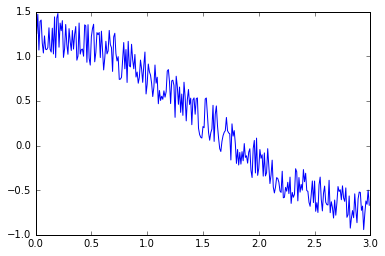

In [182]:
utils.plot_fake_data(data)

In [186]:
X = data[:,0]
y = data[:,1]

In [197]:
K = kernels.gaussian_kernel_matrix(X.reshape(-1,1))

In [205]:
krr = KRR(lmbd=0.01)
krr.train(K,y)

In [206]:
y_pred = krr.predict(K)

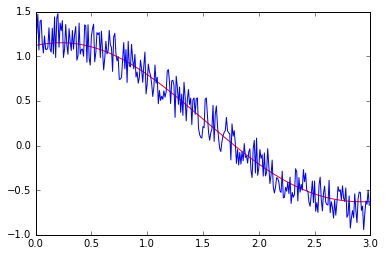

In [207]:
plt.plot(X,y_pred, color='red')
plt.plot(X, y, color="blue")
plt.show()